```
Student-1
Name:Mir Shoaib Ahmed
ID:19-41772-3
```

```
Student-2
Name:Sidul Islam Sohag
ID:20-42668-1
```



*   Mount your google drive.



In [ ]:
# mount google drive if you are using Colab
# otherewise, leave it blank

# start writing your code here
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   Import necessary libraries.



In [ ]:
# load/import all required library

# start writing your code here
import pandas
import numpy
import matplotlib.pyplot
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [ ]:
# write task-1 solution

# start writing your code here
import pandas as pd

path = "/content/drive/MyDrive/Heart Failure Prediction Dataset/heart.csv"
df = pd.read_csv(path)
df.head()


•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [ ]:
# write task-2 solution

# start writing your code here
import pandas as pd

path = "/content/drive/MyDrive/Heart Failure Prediction Dataset/heart.csv"
df = pd.read_csv(path)

print("Dataset Information:")
print(df.info())

df.fillna(df.median(), inplace=True)
df.drop_duplicates(inplace=True)

print("\nCleaned Dataset Statistics:")
print(df.describe())

print("\nFirst Few Rows of Cleaned Dataset:")
print(df.head())


•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

In [ ]:
# write task-3 solution

# start writing your code here
import pandas as pd
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/Heart Failure Prediction Dataset/heart.csv"
df = pd.read_csv(path)

categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot(kind='bar', ax=axes[i + len(numerical_columns)], color='lightcoral')
    axes[i + len(numerical_columns)].set_title(col)
    axes[i + len(numerical_columns)].set_xlabel('Category')
    axes[i + len(numerical_columns)].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

•	**Task 4:** Draw graphs to illustrate if there is any relationship between target column to any other columns of the dataset. Use Matplotlib library to complete this task. Also use sublot() function to show all plots in one figure.

In [ ]:
# write task-4 solution

# start writing your code here
import pandas as pd
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/Heart Failure Prediction Dataset/heart.csv"
df = pd.read_csv(path)

categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak','HeartDisease']

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    axes[i].scatter(df[col], df['HeartDisease'], color='skyblue', alpha=0.7)
    axes[i].set_title(f'{col} vs HeartDisease')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('HeartDisease')

for i, col in enumerate(categorical_columns):
    df.groupby([col, 'HeartDisease']).size().unstack().plot(kind='bar', stacked=True, ax=axes[i + len(numerical_columns)], colormap='coolwarm')
    axes[i + len(numerical_columns)].set_title(f'{col} vs HeartDisease')
    axes[i + len(numerical_columns)].set_xlabel(col)
    axes[i + len(numerical_columns)].set_ylabel('Count')

plt.tight_layout()
plt.show()

•	**Task 5:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling if it is needed.

In [ ]:
# write task-5 solution

# start writing your code here
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

path = "/content/drive/MyDrive/Heart Failure Prediction Dataset/heart.csv"
df = pd.read_csv(path)

X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

X_preprocessed = preprocessor.fit_transform(X)
columns = numerical_columns + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_columns))
df_preprocessed = pd.DataFrame(X_preprocessed, columns=columns)
print(df_preprocessed.head())

•	**Task 6:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 123 as the value of the random_state parameter of this function.

In [ ]:
# write task-6 solution

# start writing your code here
from sklearn.model_selection import train_test_split
import pandas as pd

path = "/content/drive/MyDrive/Heart Failure Prediction Dataset/heart.csv"
df = pd.read_csv(path)

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)

•	**Task 7:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [ ]:
# write task-7 solution

# start writing your code here
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

path = "/content/drive/MyDrive/Heart Failure Prediction Dataset/heart.csv"
df = pd.read_csv(path)

X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']


X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=123)

naive_bayes_classifier = GaussianNB()


naive_bayes_classifier.fit(X_train, y_train)

y_pred = naive_bayes_classifier.predict(X_test)

•	**Taks 8:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

Confusion Matrix:
[[63 18]
 [13 90]]


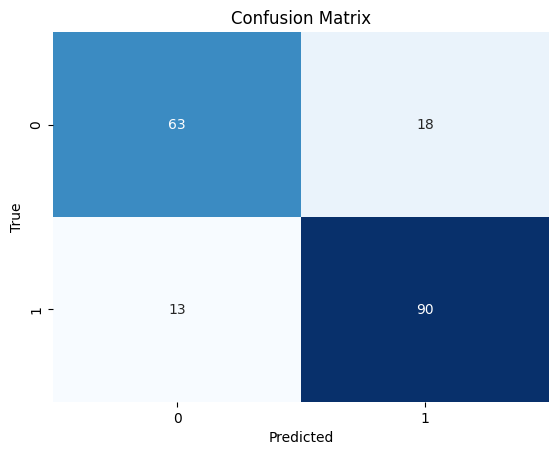

In [ ]:
# write task-8 solution

# start writing your code here
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/Heart Failure Prediction Dataset/heart.csv"
df = pd.read_csv(path)

y_pred = naive_bayes_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

•	**Task 9:** Calculate the accuracy, precision, recall and f-1 score of your model.

In [ ]:
# write task-9 solution

# start writing your code here
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB

path = "/content/drive/MyDrive/Heart Failure Prediction Dataset/heart.csv"
df = pd.read_csv(path)

naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

•	**Task 10:** Show how 10-fold cross validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [ ]:
# write task-10 solution

# start writing your code here
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

path = "/content/drive/MyDrive/Heart Failure Prediction Dataset/heart.csv"
df = pd.read_csv(path)

naive_bayes_classifier = GaussianNB()

cross_val_results = cross_val_score(naive_bayes_classifier, X_preprocessed, y, cv=10, scoring='accuracy')

for i, accuracy in enumerate(cross_val_results, 1):
    print(f'Fold {i}: Accuracy = {accuracy:.4f}')

average_accuracy = cross_val_results.mean()
print(f'\nAverage Accuracy across 10 folds: {average_accuracy:.4f}')

Fold 1: Accuracy = 0.8152
Fold 2: Accuracy = 0.9239
Fold 3: Accuracy = 0.8804
Fold 4: Accuracy = 0.9239
Fold 5: Accuracy = 0.8696
Fold 6: Accuracy = 0.8370
Fold 7: Accuracy = 0.8804
Fold 8: Accuracy = 0.7500
Fold 9: Accuracy = 0.8132
Fold 10: Accuracy = 0.8242

Average Accuracy across 10 folds: 0.8518
